In [1]:
# %load uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from math import floor, ceil
# Script to add the entire project directory structure to the python path
import sys, os

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
	sys.path.append('%s\\pyuoi' % p)

from pyuoi.linear_model.lasso import UoI_Lasso


In [2]:
from postprocess import postprocess_dir

In [3]:
os.chdir('C:\\Users\\akumar\\nse\\uoicorr')
en = postprocess_dir('01142019')

In [22]:
en.iloc[0]

beta           [[1.9922872621407905, 5.603643930329416, 1.743...
beta_hats      [[[2.803634142458937, 4.064520687972055, 2.945...
betadist                                                 uniform
block_size                                                  1000
correlation                                                    0
fn                                                     [[171.0]]
fp                                                       [[0.0]]
r2                                         [[0.751886843613121]]
r2_true                                     [0.8361396064394767]
sparsity                                                       1
Name: 0, dtype: object

### UoI Elastic net with Laplace distributed coefficients

In [33]:
en_invexp = en.loc[en['betadist'] == 'invexp']

In [36]:
en.iloc[:, 2]

0       uniform
1       laplace
2       laplace
3     clustered
4       uniform
5       laplace
6     clustered
7       uniform
8       laplace
9     clustered
10      uniform
11      laplace
12    clustered
13    clustered
14      uniform
15      laplace
16    clustered
17      uniform
18      laplace
19    clustered
20      uniform
21      laplace
22    clustered
23      uniform
24      laplace
25    clustered
26      uniform
27      laplace
28    clustered
29      uniform
Name: betadist, dtype: object

In [29]:
dat = []
dat.append(en.loc[en['betadist'] == 'laplace'])
dat.append(en.loc[en['betadist'] == 'uniform'])
dat.append(en.loc[en['betadist'] == 'inversexp'])
dat.append(en.loc[en['betadist'] == 'clustered'])

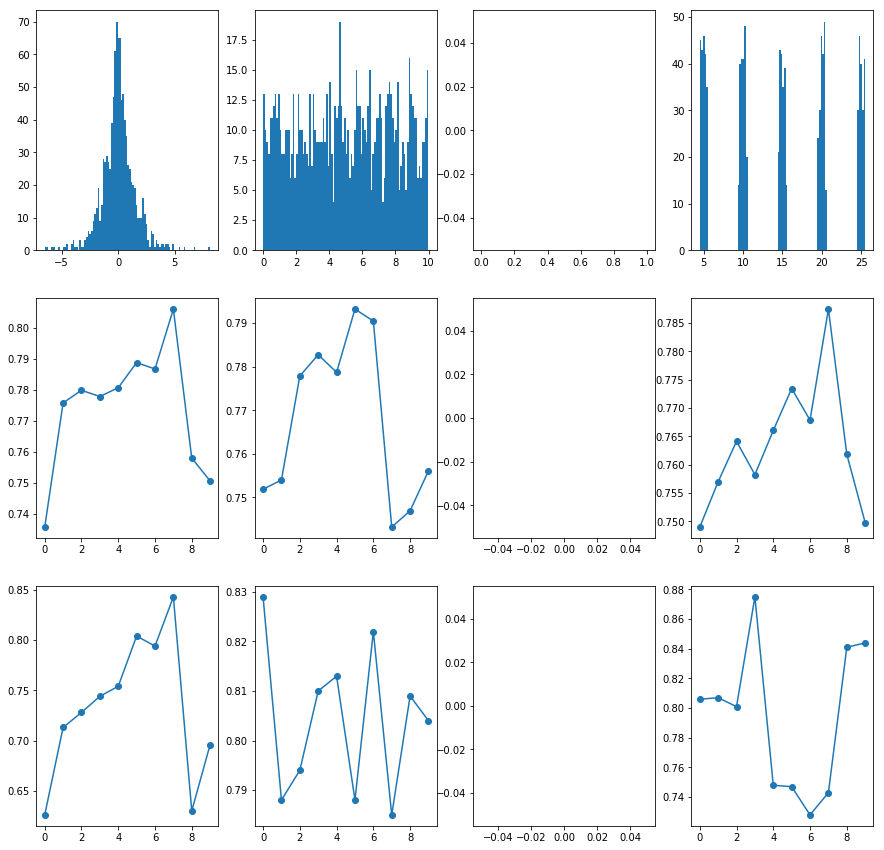

In [32]:
# Plot prediction accuracy, selection accuracy

# Need to understand estimation error and run more simulations for estimation variability 
fig, ax = plt.subplots(3, 4, figsize = (15, 15))

for i, d in enumerate(dat):
    full = d.loc[d['sparsity'] == 1]
    ax[0, i].hist(full.beta.ravel(), bins = 100)
    ax[1, i].plot(d.iloc[:, 7].values, '-o')
    ax[2, i].plot((1000 - d.iloc[:, 5].values - d.iloc[:, 6].values)/1000, '-o')



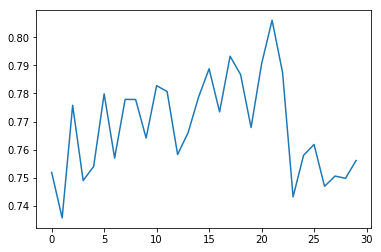

In [27]:
plt.plot(en.iloc[:,7].values)